In [1]:
%reload_ext autoreload
%autoreload 2

import os
import pickle
import logging
import multiprocessing
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import jax
import jax.numpy as jnp

import arviz as az
import numpyro
import numpyro.distributions as dist

from hbmep.config import Config
from hbmep.model.utils import Site as site

from models import (
    MixtureModel,
    RectifiedLogistic,
    Logistic5,
    Logistic4,
    ReLU
)

PLATFORM = "cpu"
jax.config.update("jax_platforms", PLATFORM)
numpyro.set_platform(PLATFORM)

cpu_count = multiprocessing.cpu_count() - 2
numpyro.set_host_device_count(cpu_count)
numpyro.enable_x64()
numpyro.enable_validation()

logger = logging.getLogger(__name__)


In [2]:
dir = "/home/vishu/repos/hbmep-paper/reports/paper/tms/model-comparison"
src = os.path.join(dir, "mixture-model", "response-prior-on-a", "inference.pkl")
with open(src, "rb") as f:
    _, mcmc, posterior_samples = pickle.load(f)


In [3]:
a_mean = posterior_samples["a_mean"]
a_mean.shape


(4000, 2, 6)

In [4]:
for muscle_ind in range(6):
    samples = a_mean[:, 1, muscle_ind] - a_mean[:, 0, muscle_ind]
    print((samples < 0).mean())


0.33675
0.754
0.87975
0.88675
0.93475
0.72525


In [5]:
for muscle_ind in range(6):
    samples = a_mean[:, 1, muscle_ind] - a_mean[:, 0, muscle_ind]
    print((samples < 0).mean())


0.355
0.91575
0.89025
0.932
0.96825
0.5515


<Axes: ylabel='Density'>

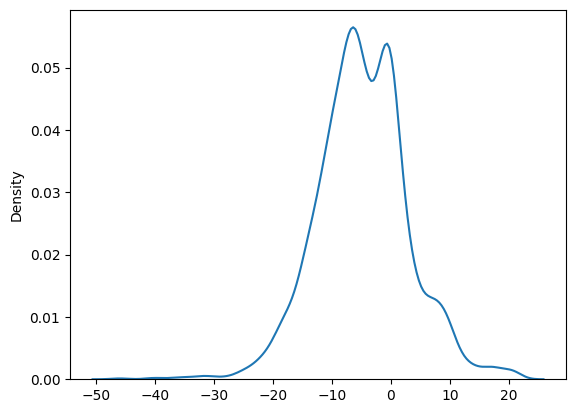

In [5]:
muscle_ind = 1
samples = a_mean[:, 1, muscle_ind] - a_mean[:, 0, muscle_ind]
sns.kdeplot(samples)


In [7]:
a_mean_global_mean = posterior_samples["a_mean_global_mean"]
a_mean_global_mean.mean(axis=0)

array([36.08518284, 38.87671533, 41.3553161 , 41.04440727, 40.80256139,
       36.08533969])

<Axes: ylabel='Density'>

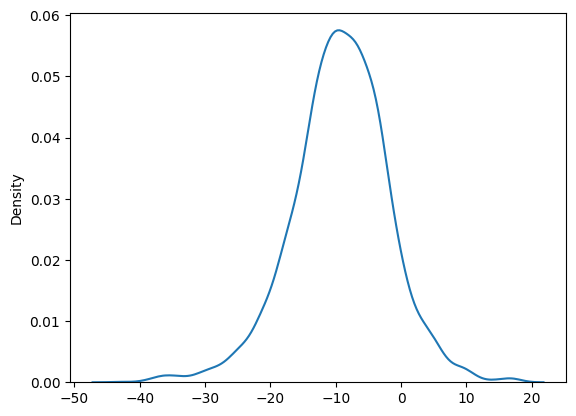

In [6]:
muscle_ind = 1
samples = a_mean[:, 1, muscle_ind] - a_mean[:, 0, muscle_ind]
sns.kdeplot(samples)
